In [1]:
## run florence2

In [3]:
from mb_annotation.florencefile import florence_model

/home/malav/.local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-09-19 13:32:43.900603: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-19 13:32:44.699479: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
florence_test = florence_model()

In [5]:
florence_test.get_task_types()

{'captions': ['<CAPTION>', '<DETAILED_CAPTION>', '<MORE_DETAILED_CAPTION>'],
 'character_recognition': ['<OCR>', '<OCR_WITH_REGION>'],
 'object_detection': ['<OD>', '<REGION_PROPOSAL>', '<DENSE_REGION_PROPOSAL>'],
 'segmentation': ['<REGION_TO_SEGMENTATION>'],
 'description': ['<REGION_TO_CATOGORY>', '<REGION_TO_DESCRIPTION>'],
 'extra': ['<PHRASE_GROUNDING>',
  '<OPEN_VOCABULARY_DETECTION>',
  '<REFERRING_EXPRESSION_SEGMENTATION>']}

In [6]:
florence_test.define_task(task_type=['<OD>'])

In [7]:
florence_test.set_image('./test_data/4.jpg')
res = florence_test.generate_text()
res

[{'<OD>': {'bboxes': [[24.0, 6.0, 617.9199829101562, 478.3199768066406],
    [131.52000427246094,
     92.87999725341797,
     527.0399780273438,
     427.44000244140625]],
   'labels': ['bowl', 'egg']}}]

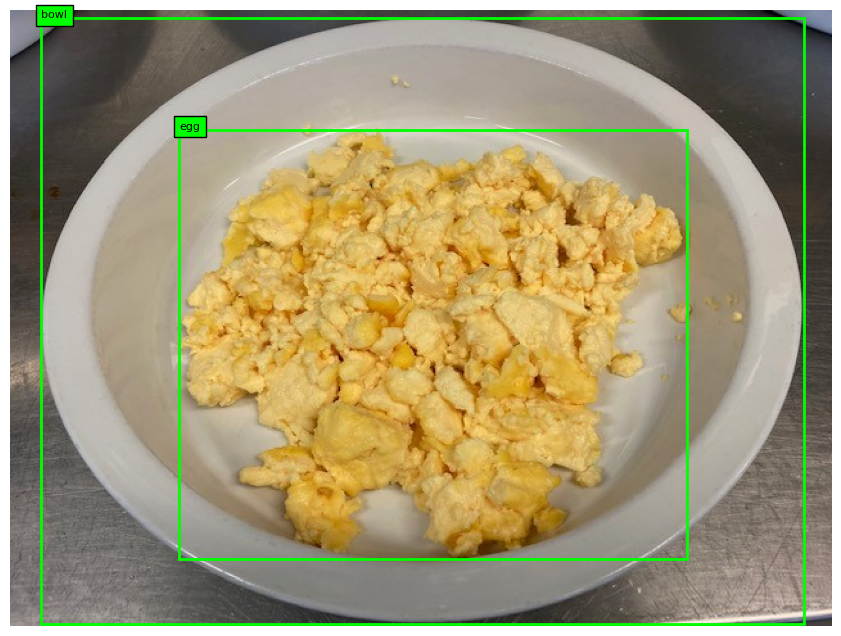

In [8]:
florence_test.plot_box(res[0]['<OD>'],show=True)

In [2]:
## fine tune florence

In [1]:
from mb_annotation.florencefile import florence_model,load_florence_dataset,dataset_data

/home/malav/.local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-09-23 18:45:59.260786: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-23 18:45:59.982915: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
t1_florence = florence_model(model_name="microsoft/Florence-2-base-ft",finetuned_model=False)

In [3]:
dataset = load_florence_dataset(csv_file_path='/home/malav/Downloads/datasets/pp_dataset/data_to_test/final_dataset.csv')

final csv example:                                                image prefix  \
0  /home/malav/Downloads/datasets/pp_dataset/data...   <OD>   
1  /home/malav/Downloads/datasets/pp_dataset/data...   <OD>   

                                    suffix  
0  dish<loc_58><loc_0><loc_1142><loc_1496>  
1   dish<loc_0><loc_0><loc_1200><loc_1600>  


In [4]:
train_data = dataset.df[dataset.df.train_type=='train'].reset_index()
val_data = dataset.df[dataset.df.train_type=='validation'].reset_index()

In [5]:
train_dataset = dataset_data(train_data)
val_dataset = dataset_data(val_data)

In [6]:
train_loader = t1_florence.dataloader(train_dataset, batch_size=2)
val_loader = t1_florence.dataloader(val_dataset, batch_size=2)

In [7]:
lora_model =t1_florence.load_lora_data()

trainable params: 1,929,928 || all params: 272,733,896 || trainable%: 0.7076


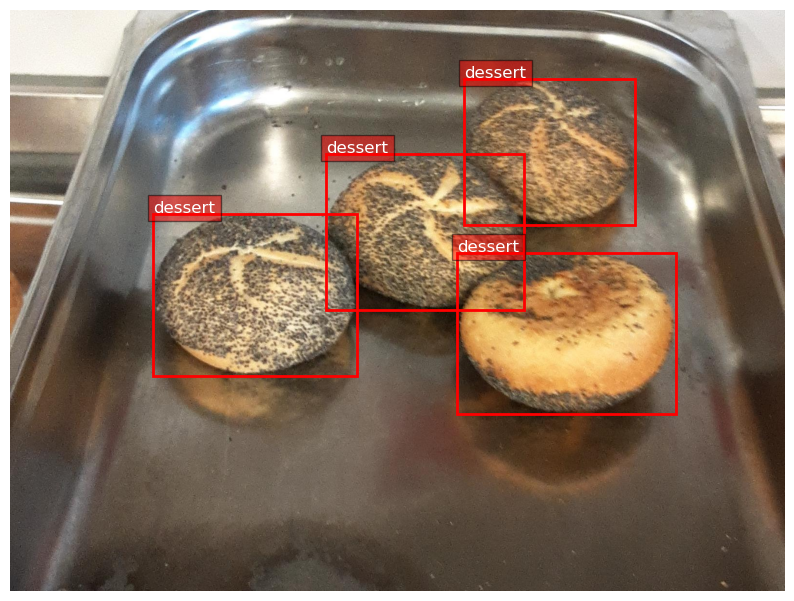

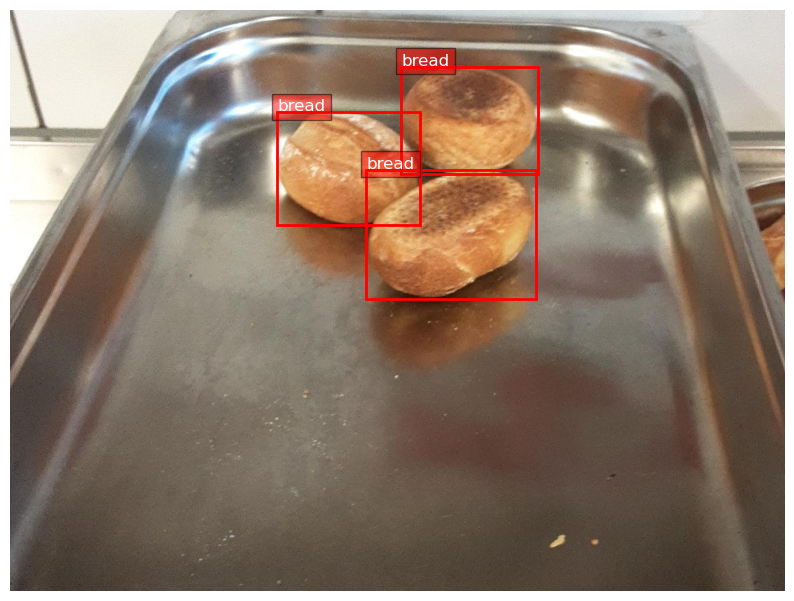

{'<OD>': {'bboxes': [[735.2000122070312,
    329.4000244140625,
    1085.5999755859375,
    595.800048828125],
   [551.2000122070312,
    210.60000610351562,
    845.6000366210938,
    444.6000061035156],
   [807.2000122070312,
    117.00000762939453,
    1090.4000244140625,
    337.8000183105469]],
  'labels': ['bread', 'bread', 'bread']}}

In [8]:
t1_florence.florence2_inference_results(val_loader, 2)

/home/malav/.local/lib/python3.11/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Training Epoch 1/3: 100%|██████████| 80/80 [08:47<00:00,  6.59s/it]


Average Training Loss: 3.92522744089365


Validation Epoch 1/3: 100%|██████████| 20/20 [00:50<00:00,  2.50s/it]


Average Validation Loss: 1.988784021139145


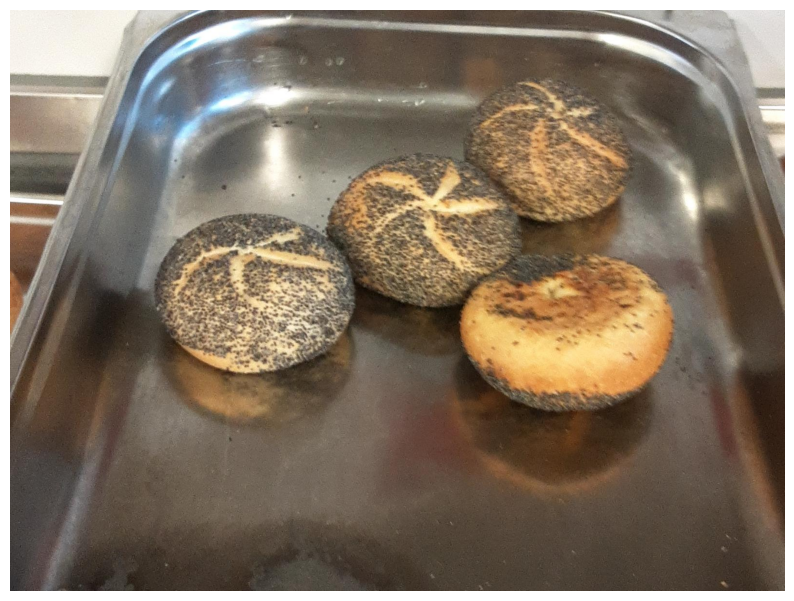

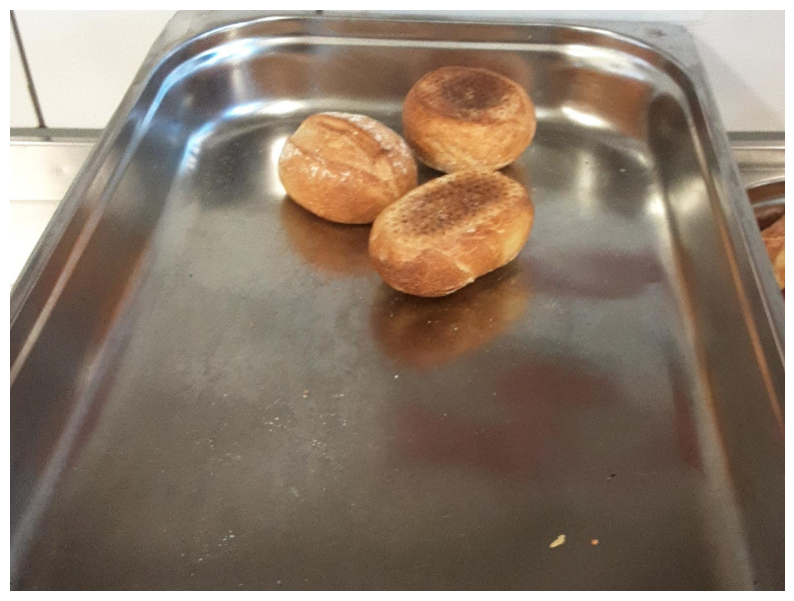

Training Epoch 2/3: 100%|██████████| 80/80 [08:40<00:00,  6.50s/it]


Average Training Loss: 1.5881861362606287


Validation Epoch 2/3: 100%|██████████| 20/20 [00:50<00:00,  2.50s/it]


Average Validation Loss: 1.3966348975896836


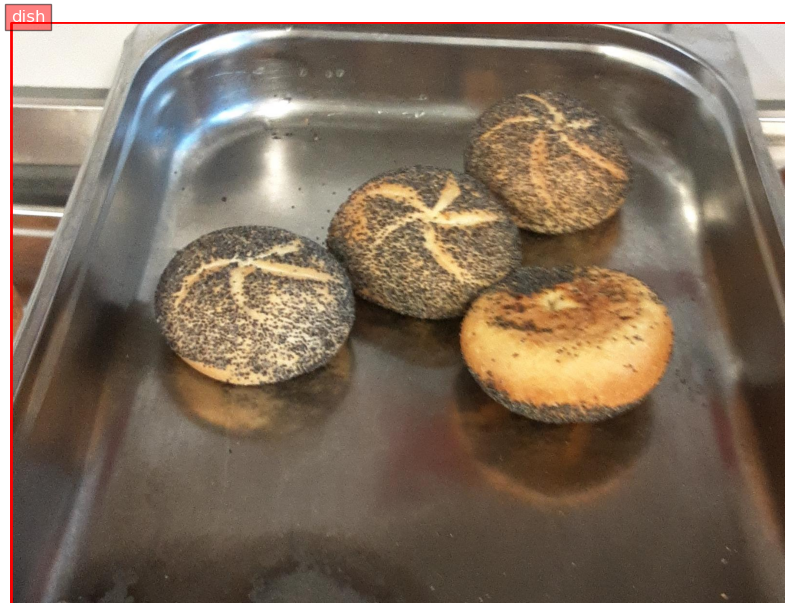

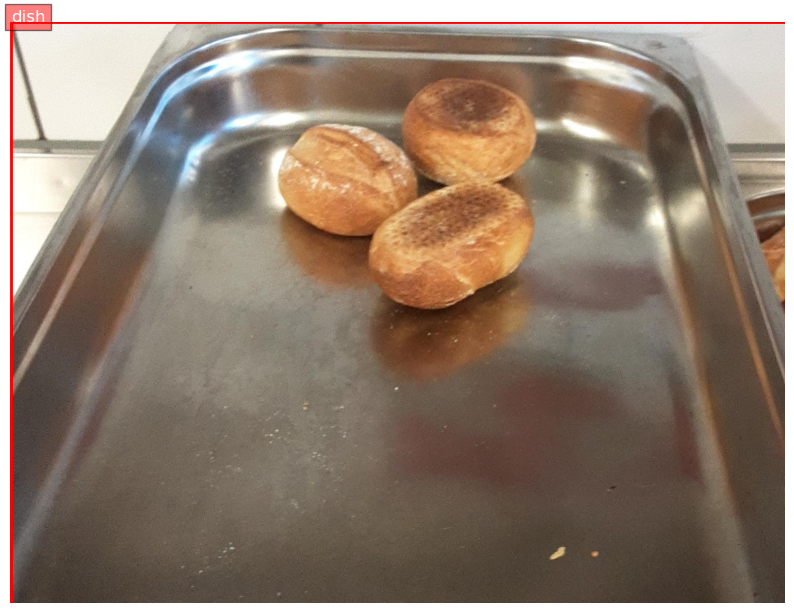

Training Epoch 3/3: 100%|██████████| 80/80 [08:48<00:00,  6.60s/it]


Average Training Loss: 1.2265099585056305


Validation Epoch 3/3: 100%|██████████| 20/20 [00:50<00:00,  2.55s/it]


Average Validation Loss: 1.3530869528651237


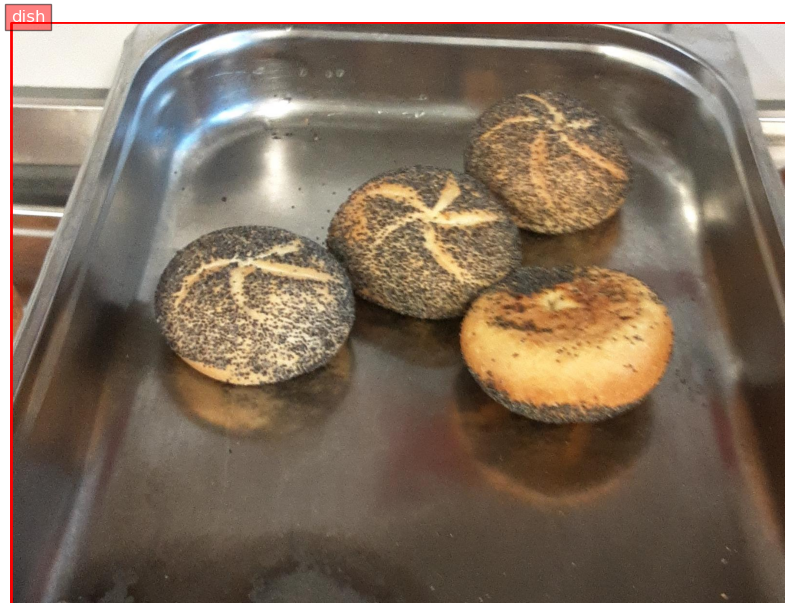

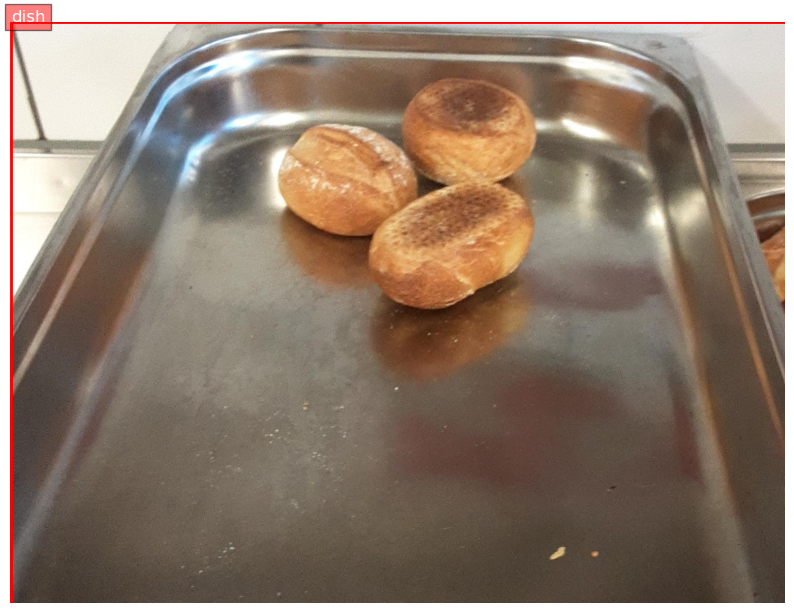

In [9]:
t1_florence.train_model(train_loader, val_loader, epochs=3, lr=4e-5)